
# Introduction

---
It is important to know the group of patients that more spend your money in hospital, because the hospital can do price policy and know the most expensive patients (if they have the price cost).

In here, were go make an exploratory data analysis and to compare four regression models (Linear regression, polynomial regression, random forest regressor and decision three regressor)


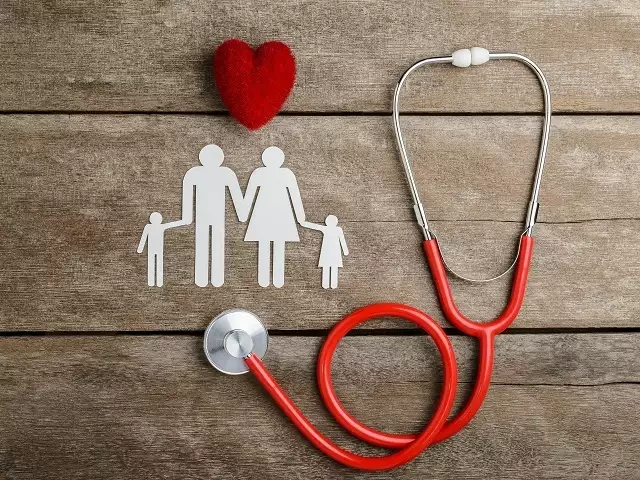

# About dataset

---

This dataset contains person's information like age, sex, gender, bmi,region, smoke or not and we have to predict their medical insurance cost.In this notebook I will apply four regression techniques predict the medical insurance costs.

# Let's code!!

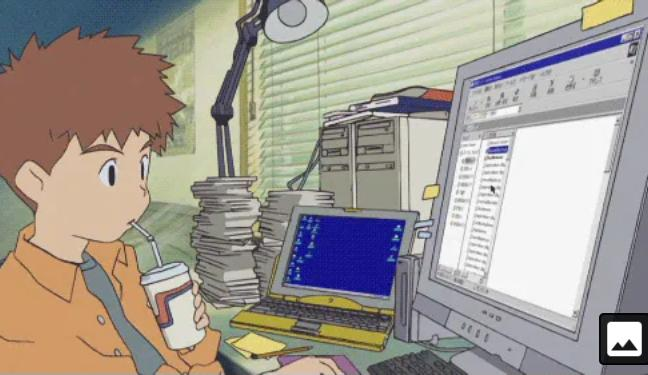

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.despine(left=True, bottom=True)

In [ ]:
cores_genero = ['#8181F7','#F781D8']
cores_fumante = ['#8FBC8F', '#008080']
paleta_genero = sns.color_palette(cores_genero)
paleta_fumante = sns.color_palette(cores_fumante)

In [ ]:
df = pd.read_csv('../input/insurance/insurance.csv')
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
def bmi_cat(i):
    if 18.5 > i:
      return 'underweith'
    elif 18.5 <= i <= 25:
      return 'normalweith'
    elif 25 < i <= 30:
      return 'overweith'
    elif i > 30:
      return 'obese'



df['obes'] = df['bmi'].apply(lambda i: bmi_cat(i))

I did this because there are differents 'bmi' in each 'obesity', so to dont occur a distortion, I preferred use both columns

In [ ]:
def kids(x):
  if x > 0:
    return 'yes'
  else:
    return 'no'
  
df['kids'] = df['children'].apply(lambda x: kids(x))

Verify the NaN data

In [ ]:
df.isnull().sum()

In [ ]:
df.describe(include='O')

## Individual

---

Exploratory data analysis of each column

### Sex

In [ ]:
df['sex'].value_counts()

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.pie(df['sex'].value_counts(), labels=['MASCULINO', 'FEMININO'], colors=cores_genero);

### Age

In [ ]:
print(f'Median:     {df.age.median()}')
print(f'{df.age.describe()}')

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.distplot(df['age'])
sns.despine()

### Smoker

In [ ]:
df.smoker.value_counts()

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.pie(df['smoker'].value_counts(), labels=['NÃO-FUMANTE', 'FUMANTE'], colors=cores_fumante);

### Children

In [ ]:
df['children'].value_counts()

In [ ]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x='children',data=df)
sns.despine()

### Bmi

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.distplot(df['bmi'])
sns.despine()

### Bmi categorical

In [ ]:
df['obes'].value_counts()

In [ ]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x='obes',order = df.obes.value_counts().index,data=df, palette=sns.cubehelix_palette(4, reverse=True));

In [ ]:
fig = plt.figure(figsize=(12,5))
sns.violinplot(y='bmi', x='obes',data=df, palette=sns.color_palette("Set2"));

### Region

In [ ]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x='region', data=df, palette=sns.color_palette("Set3"))
sns.despine()

### Charges

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.distplot(df['charges'])
sns.despine()

## Comparisons


### Sex and age

In [ ]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
sns.distplot(df[df['sex']=='male']['age'])
sns.despine()
ax = fig.add_subplot(122)
sns.distplot(df[df['sex']=='female']['age'], color='#F781D8')
sns.despine()

In [ ]:
fig2 = plt.figure(figsize=(15,5))
sns.distplot(df[df['sex']=='male']['age'], color='#8181F7')
sns.distplot(df[df['sex']=='female']['age'], color='#F781D8')
sns.despine()

### Sex and bmi

In [ ]:
fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(121)
plt.hist(df[df['sex']=='male']['bmi'], bins=15)
sns.despine()
ax = fig.add_subplot(122)
plt.hist(df[df['sex']=='female']['bmi'], color='pink', bins=15)
sns.despine();

In [ ]:
fig = plt.figure(figsize=(11,7))
plt.hist(df[df['sex']=='male']['bmi'], bins=15)
plt.hist(df[df['sex']=='female']['bmi'], color='pink', bins=15)
sns.despine();

### Sex and smoker

In [ ]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x='smoker', hue_order=df['sex'].value_counts().index, hue='sex',data=df, palette=paleta_genero)
sns.despine()

### Charges and age

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.distplot(df['charges'])
sns.despine()

In [ ]:
sns.lmplot('age', 'charges', data=df)
sns.despine()

In [ ]:
sns.pairplot(df);

### Smokers e charges

In [ ]:
fig = plt.figure(figsize=(12,5))
sns.boxplot(x='smoker', y='charges', palette=paleta_fumante, data=df)
sns.despine()

In [ ]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
sns.distplot(df[df['smoker']=='yes']['charges'],color='#8FBC8F' , ax=ax)
sns.despine()
ax = fig.add_subplot(122)
sns.distplot(df[df['smoker']=='no']['charges'],color='#008080', ax=ax)
sns.despine();

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.distplot(df[df['smoker']=='yes']['charges'], color= '#8FBC8F')
sns.distplot(df[df['smoker']=='no']['charges'], color= '#008080')
sns.despine()

In [ ]:
fig = plt.figure(figsize=(12,5))
sns.boxplot(x='smoker', y='charges',hue='sex',hue_order=df['sex'].value_counts().index, data=df, palette=paleta_genero)
sns.despine()

### Smokers and ages

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.violinplot(x='smoker', y='age', data=df, pallete=paleta_fumante);

## More comparisons


### Age x charges x smoker

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.lmplot('age', 'charges',hue='smoker', data=df, palette=paleta_fumante)

In [ ]:
sns.jointplot(x="age", y="charges", data=df[df.smoker=='yes'],color='#F781D8', kind="kde");

In [ ]:
sns.jointplot(x="age", y="charges", data=df[df.smoker=='no'],color='#F781D8', kind="kde");

### Age x charges x obes

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.lmplot('age', 'charges', col='obes', data=df, palette=paleta_fumante)

### Age x charges x smoker x sex x obes

### Bmi x charges x obes

In [ ]:
fig=plt.figure(figsize=(12,5))
sns.scatterplot(x="bmi", y="charges",hue= 'obes',data=df,palette=sns.cubehelix_palette(4));

### Bmi x charges x obes x sex

In [ ]:
sns.lmplot(x="bmi", y="charges",hue= 'obes',col='sex', data=df,palette=sns.cubehelix_palette(4));

### Bmi x charges x obes x sex x smoker

In [ ]:
sns.lmplot(x="bmi", y="charges",hue= 'obes',col = 'sex', data=df,palette=sns.cubehelix_palette(4));

### Bmi x charges x smoker

In [ ]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette=paleta_fumante);

### Bmi x charges x sex

In [ ]:
sns.lmplot(x="bmi", y="charges", hue="sex", data=df, palette=paleta_genero);

### Bmi x charges x sex x kids

In [ ]:
sns.lmplot(x="bmi", y="charges", hue="sex",col='kids' ,data=df, palette=paleta_genero);

### Bmi x charges x children

In [ ]:
sns.lmplot('bmi', 'charges',col='children', data=df)

## Pre processing

In [ ]:
sns.heatmap(df.corr());

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)

le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)

le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

le.fit(df.obes.drop_duplicates())
df.obes = le.transform(df.obes)

le.fit(df.kids.drop_duplicates())
df.kids = le.transform(df.kids)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['charges', 'region'],axis=1)
Y = df['charges']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

## Comparing models

### Linear Regression

It is used to estimate real values (cost of houses, numbers of colls, total sales, etc.) based on continuous variable(s).Here, we establish relationship between independent and dependent variables by fitting a best line. This best fit line is known as regression line and represented by a linear equation

linear.png

These coefficientes a and b are derived based on minimizing the sum of squared data points and regression line.Linear Regression is of mainly two types:

1. Simple Linear Regression
2. Multiple Linear Regression

Simple Linear Regression is characterized by one independet variable. And, Multiple Linear Regression (as the name suggest) is characterized by multiple (more than 1) independent variables.

The variable u, called the error term or disturbance in the relationship, represents factors other than x that affect y. A simple regression analysis effectively treats all factors affecting y other than x as being unobserved. You can usefully think of u as standing for “unobserved.”

**Python Code:**

```
#Import Libraries
from sklearn.linear_model import LinearRegression

#Create Linear Regression
linearmodel = LinearRegression()

#Fit Linear Regression
linear.fit(X_train, Y_train)

#Score (R²)
linear.score(X_train, Y_train)

#Equation coefficients and intercept
print(f'Cofficient: {linear.coef_'})print(f'Intercept: {linear.intercept_'})

#Predict 
output_predicted = linear.predict(x_test)
```

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

linear = LinearRegression()
linear.fit(X_train, Y_train)
linear.score(X_test, Y_test)

In [ ]:
linear_coefs = linear.coef_
linear_intercept = linear.intercept_
linear_intercept

In [ ]:
df_linear_coef = pd.DataFrame(linear_coefs, index=X.columns, columns=['Coefficients'])
df_linear_coef.T

### Polynomial Regression

---
In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.

In general, we can model the expected value of y as an nth degree polynomial, yielding the general polynomial regression model:


polynomial regression.png



```
#Import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Write de model
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

#Train the model
polyreg.fit(X_train,Y_train)

#Score (R²)
polyreg.score(X_test, Y_test)
```





In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree=3
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,Y_train)

polyreg.score(X_test, Y_test)

### Decision tree Regressor

---
Decision tree learning is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Decision trees are among the most popular machine learning algorithms given their intelligibility and simplicity

**Python code**


```
#Import libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

#Write the model
dt_regressor = DecisionTreeRegressor(random_state=0)

#Score
cross_val_score(dt_regressor,X_test, Y_test, cv=10).mean()```




In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train, Y_train)
cross_val_score(dt_regressor,X_test, Y_test, cv=10).mean()

### Random Forest regressor

---
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees

**Python code**


```
#Import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

#Write the model
randomF = RandomForestRegressor(n_estimators = 100, criterion = 'mse', random_state = 1, n_jobs = -1)

#Train the model
randomF.fit(X_train, Y_train)
randomF_train_pred = randomF.predict(X_train)
randomF_test_pred = randomF.predict(X_test)

#Score
r2_score(Y_test,randomF_test_pred)```




In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

randomF = RandomForestRegressor(n_estimators = 100, criterion = 'mse', random_state = 1, n_jobs = -1)
randomF.fit(X_train, Y_train)

randomF_train_pred = randomF.predict(X_train)
randomF_test_pred = randomF.predict(X_test)


r2_score(Y_test,randomF_test_pred)

# Result


1.   Polynomial Regression (SCORE: **0.8978235718637472**)  ~ 0.90
1.   Random Forest Regressor (SCORE: **0.8732885285925158**)  ~ 0.87
2.   Linear Regression (SCORE: **0.7990687615437146**) ~ 0.80
2.   Decision Tree Regressor (SCORE:**0.7366794077671697**) ~ 0.74




# Extra

---
Analyzing data on spending in hospitals alerts us to the importance of health care. We can get some health tips from this exploratory data analysis:

**DO NOT SMOKE!!!!!**

**Stay at the ideal weight**

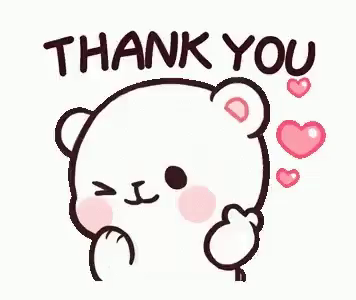